In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/kaggle-titanic-master/titanic-solution.ipynb
/kaggle/input/titanic/kaggle-titanic-master/images/titanic-disaster.jpg
/kaggle/input/titanic/kaggle-titanic-master/input/train.csv
/kaggle/input/titanic/kaggle-titanic-master/input/test.csv
/kaggle/input/titanic/kaggle-titanic-master/input/gender_submission.csv
/kaggle/input/titanic/kaggle-titanic-master/kaggle-titanic-master/titanic-solution.ipynb
/kaggle/input/titanic/kaggle-titanic-master/kaggle-titanic-master/images/titanic-disaster.jpg
/kaggle/input/titanic/kaggle-titanic-master/kaggle-titanic-master/input/train.csv
/kaggle/input/titanic/kaggle-titanic-master/kaggle-titanic-master/input/test.csv
/kaggle/input/titanic/kaggle-titanic-master/kaggle-titanic-master/input/gender_submission.csv
/kaggle/input/test-file/tested.csv
/kaggle/input/titanicdataset/train.csv


In [2]:
titanic= pd.read_csv("../input/titanicdataset/train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.shape

(891, 12)

# Missing Data and Duplication

In [5]:
missing= titanic.isna().sum()
total_cells=len(titanic.index)
percentage=round((missing/total_cells)*100,2)
print(percentage)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64


In [6]:
titanic= titanic.drop(['Cabin'], axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [7]:
age= titanic['Age'].mean()
fare= titanic['Fare'].mean()
titanic = titanic.fillna({'Age' : age , 'Fare' : fare})
titanic['Age'] = titanic['Age'].astype(int)

In [8]:
titanic.duplicated().sum()

0

# Outliers

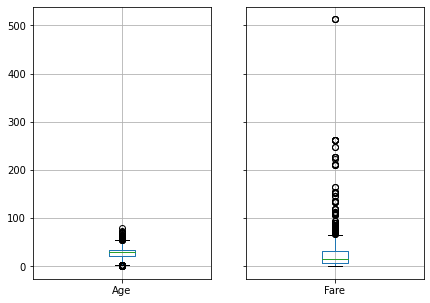

In [9]:

fig, ( ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7,5))
titanic.boxplot('Age', ax=ax1)
titanic.boxplot('Fare', ax=ax2)
plt.show()


In [10]:
#from above outliers exist in last two numeric columns : {Age, Fare}
def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    lowerBound = Q1 - 1.5 * IQR
    upperBound = Q3 + 1.5 * IQR
    lst = df.index[(df[ft] < lowerBound)|(df[ft] > upperBound)]
    return lst

In [11]:

lst=[]
for ft1 in ['Age']:
    lst.extend(outliers(titanic,ft1))
for ft2 in ['Fare']:
    lst.extend(outliers(titanic,ft2))
titanic = titanic.drop(lst)


# Visualization of survivals

*Survivals according to Age nd Gender*

In [12]:
titanic[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=0)

,Sex,Survived
0,female,0.688312
1,male,0.171429


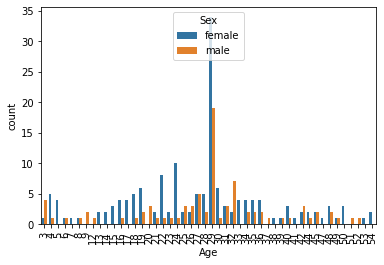

In [13]:
survivals = titanic.loc[titanic.Survived == 1]
sns.countplot(data = survivals, x = 'Age', hue = 'Sex')
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(18,8.27)})
plt.show()

*according to class*

Text(0.5, 1.0, 'survivals according to their class')

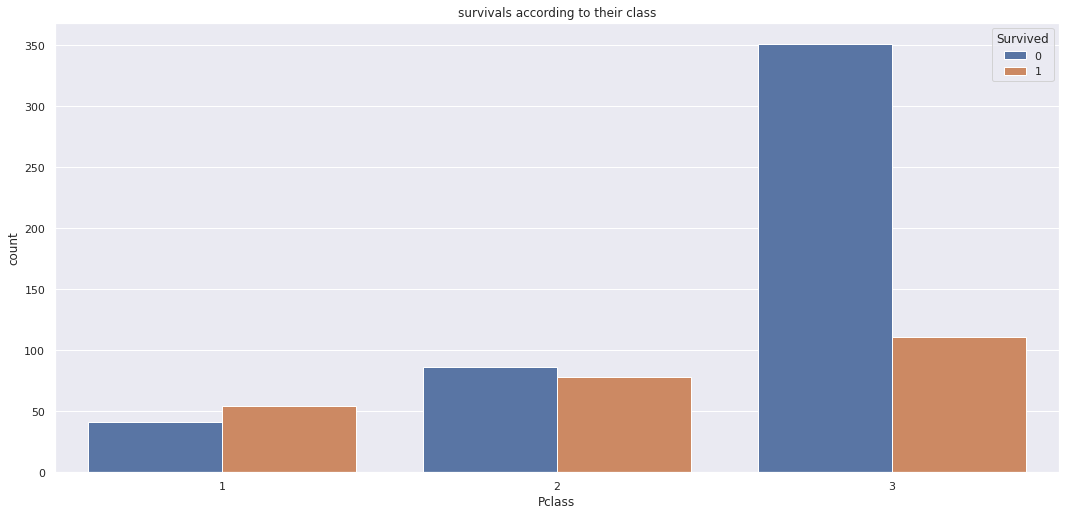

In [14]:
sns.countplot(data = titanic, x = 'Pclass', hue = 'Survived')
sns.set(rc={'figure.figsize':(7,7)})
plt.title('survivals according to their class')

*accroding to fare and the class*

In [15]:
titanic.groupby('Pclass')[['Survived','Fare']].sum()

,Survived,Fare
Pclass,,
1,54,3596.2793
2,78,3121.2375
3,111,5820.5618


In [16]:
titanic.groupby('Sex', as_index=False)[['Survived']].mean()

,Sex,Survived
0,female,0.688312
1,male,0.171429


In [17]:
t1=titanic.groupby(['Pclass','Sex'], as_index=False)[['Survived']].sum()


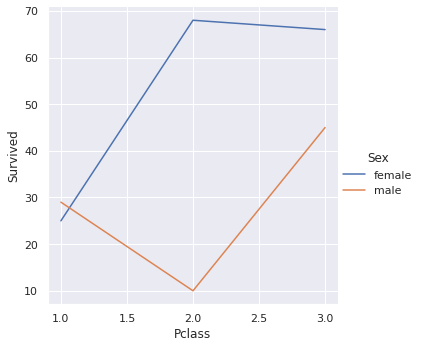

In [18]:
sns.relplot(data=t1, x='Pclass', y='Survived', hue='Sex', kind='line')
#a plot shows the diversity in survived number of people according to their class in both males and females

In [19]:
titanic.groupby('Survived', as_index=False)['SibSp'].sum()

,Survived,SibSp
0,0,197
1,1,102


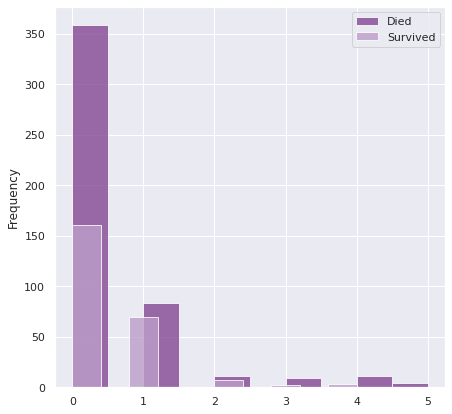

In [20]:
sns.set_palette("PRGn")
titanic.groupby('Survived', as_index=False)['SibSp'].plot.hist(histtype= 'bar',alpha = 0.8)
sns.set(rc={'figure.figsize':(7,8.27)})
plt.legend(('Died','Survived'),)
plt.show()

Text(0.5, 1.0, 'how Families located in different calss could make it')

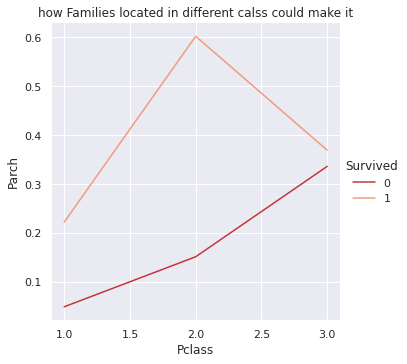

In [21]:
sns.set_palette("RdBu")
sns.relplot(x="Pclass",             
            y="Parch",             
            data=titanic,            
            kind="line",
            hue= 'Survived',
            ci=None
            )
plt.title('how Families located in different calss could make it')